In [1]:
import ODE_models
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
def signal(amp, freq):
    return amp * np.sin(2 * np.pi * freq * t)

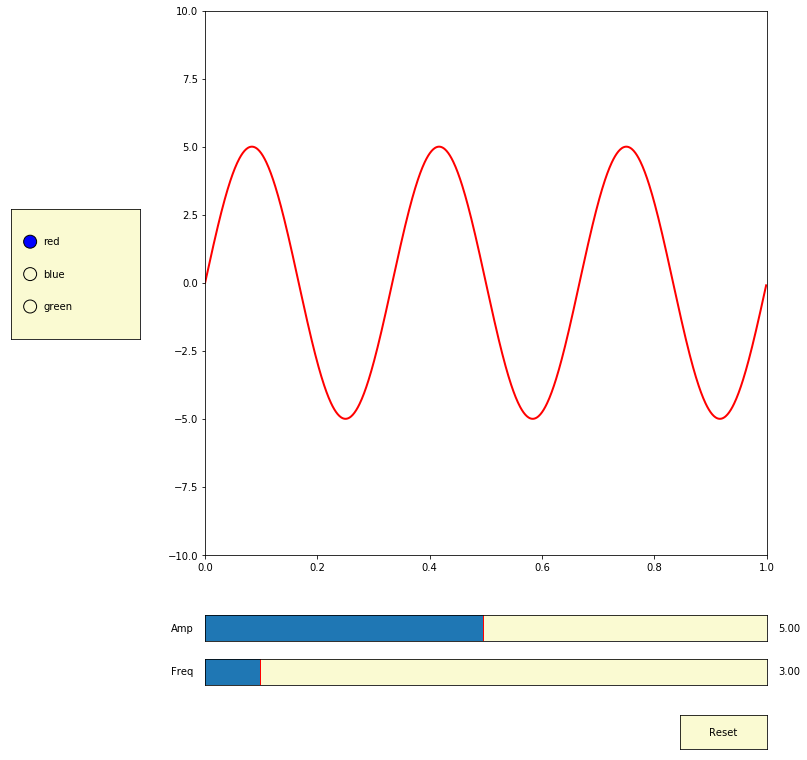

In [3]:
axis_color = 'lightgoldenrodyellow'
matplotlib.rcParams['figure.figsize'] = [12, 12]

fig = plt.figure()
ax = fig.add_subplot(111)

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(left=0.25, bottom=0.25)

t = np.arange(0.0, 1.0, 0.001)
amp_0 = 5
freq_0 = 3

# Draw the initial plot
# The 'line' variable is used for modifying the line later
[line] = ax.plot(t, signal(amp_0, freq_0), linewidth=2, color='red')
ax.set_xlim([0, 1])
ax.set_ylim([-10, 10])

# Add two sliders for tweaking the parameters

# Define an axes area and draw a slider in it
amp_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
amp_slider = Slider(amp_slider_ax, 'Amp', 0.1, 10.0, valinit=amp_0)

# Draw another slider
freq_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
freq_slider = Slider(freq_slider_ax, 'Freq', 0.1, 30.0, valinit=freq_0)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    line.set_ydata(signal(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
amp_slider.on_changed(sliders_on_changed)
freq_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    amp_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

# Add a set of radio buttons for changing color
color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
def color_radios_on_clicked(label):
    line.set_color(label)
    fig.canvas.draw_idle()
color_radios.on_clicked(color_radios_on_clicked)

plt.show()

hello2.0


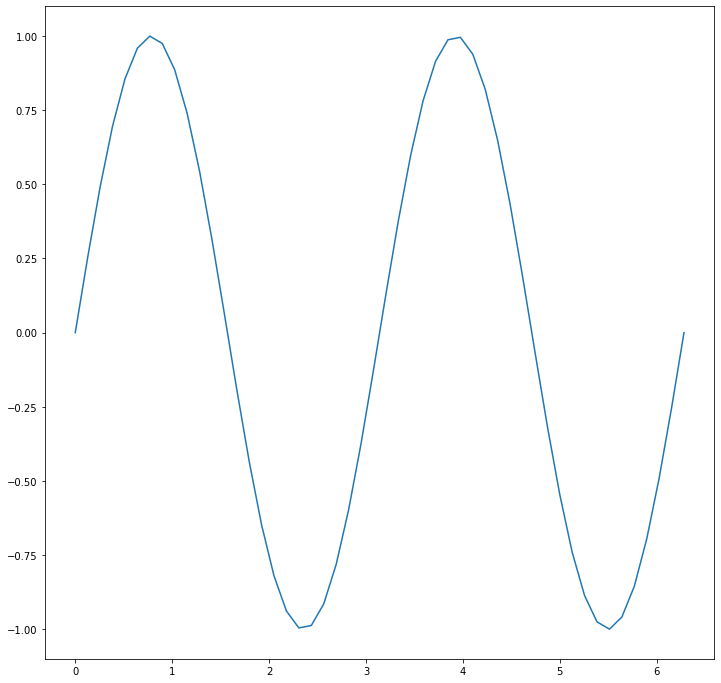

interactive(children=(IntSlider(value=5, continuous_update=False, description='Square:', max=10), Output()), _…

<function __main__.draw_update(w=2.0)>

In [5]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig,ax = plt.subplots()

slider = ipywidgets.IntSlider(value=5,
                              min=0,
                              max=10,
                              step=1,
                              description='Square:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')


def draw_update(w = 2.0):
    ax.clear()
    print('hello{}'.format(w))
    ax.plot(x, np.sin(w * x))
    plt.show()

draw_update()
ipywidgets.interact(draw_update, w=slider)

In [6]:
import ipywidgets

slider = ipywidgets.IntSlider(value=5,
                              min=0,
                              max=10,
                              step=1,
                              description='Square:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')

def square1(number):
    return number*number

ipywidgets.interact(square1, number=slider);


interactive(children=(IntSlider(value=5, continuous_update=False, description='Square:', max=10), Output()), _…

In [7]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

ModuleNotFoundError: No module named 'ipympl'